In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
import kagglehub

path = kagglehub.dataset_download("notshrirang/reliance-stock-price-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/reliance-stock-price-dataset


In [31]:
df = pd.read_csv('/kaggle/input/reliance-stock-price-dataset/reliance_data.csv')
df = df.set_index('Date')
df.index = pd.to_datetime(df.index, format='%d-%m-%Y')

In [20]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
1996-01-01,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1996-01-02,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
1996-01-03,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
1996-01-04,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
1996-01-05,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


In [21]:
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083700e+15,497781.0,5148955.0,0.2461
2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787040e+15,362587.0,3213843.0,0.2251
2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965870e+15,356793.0,3040444.0,0.2019
2020-11-26,RELIANCE,EQ,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,1946.67,11924527,2.321310e+15,266412.0,3406506.0,0.2857
2020-11-27,RELIANCE,EQ,1952.60,1940.50,1956.10,1921.40,1940.50,1929.80,1935.45,21845931,4.228160e+15,314085.0,12489338.0,0.5717


In [22]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                   548
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                3849
Deliverable Volume    1512
%Deliverble           1512
dtype: int64

In [23]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,6205.000000,6205.000000,6205.000000,6205.000000,5657.000000,6205.000000,6205.000000,6.205000e+03,6.205000e+03,2.356000e+03,4.693000e+03,4693.000000
mean,864.978445,866.381176,878.763811,852.795649,925.596986,865.291289,865.851146,6.215219e+06,5.187662e+14,1.383690e+05,2.239901e+06,0.436332
std,588.711275,590.165211,599.625939,578.473998,581.604138,588.763023,588.941488,5.479271e+06,7.539147e+14,1.260736e+05,1.861021e+06,0.145526
min,0.000000,102.600000,105.600000,99.600000,101.600000,101.300000,101.840000,5.282000e+04,3.480000e+12,2.991000e+03,2.909700e+04,0.076300
25%,335.200000,335.000000,340.700000,329.500000,437.550000,335.350000,335.710000,3.021751e+06,1.840000e+14,7.119900e+04,1.178486e+06,0.323000
50%,850.650000,852.500000,862.000000,842.100000,892.350000,850.700000,851.680000,4.602904e+06,3.270000e+14,9.841550e+04,1.784092e+06,0.452300
75%,1089.400000,1091.100000,1107.000000,1073.950000,1129.900000,1089.850000,1089.480000,7.304408e+06,5.730000e+14,1.559778e+05,2.685974e+06,0.546300
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473430e+16,1.428490e+06,3.495888e+07,0.978300


In [32]:
df_close = df[['Close']].copy()

In [33]:
df_close.head()

,Close
Date,
1996-01-01,205.75
1996-01-02,204.15
1996-01-03,205.70
1996-01-04,203.80
1996-01-05,202.40


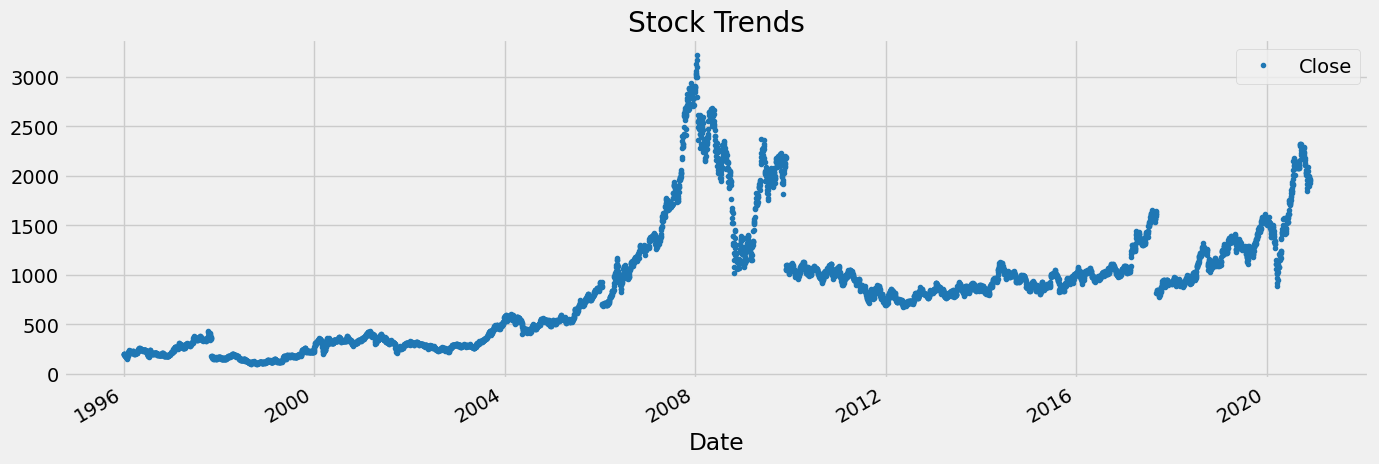

In [34]:
df_close.plot(style='.',
       figsize=(15, 5),
       color=color_pal[0],
       title='Stock Trends')
plt.show()

# Train/Test Split

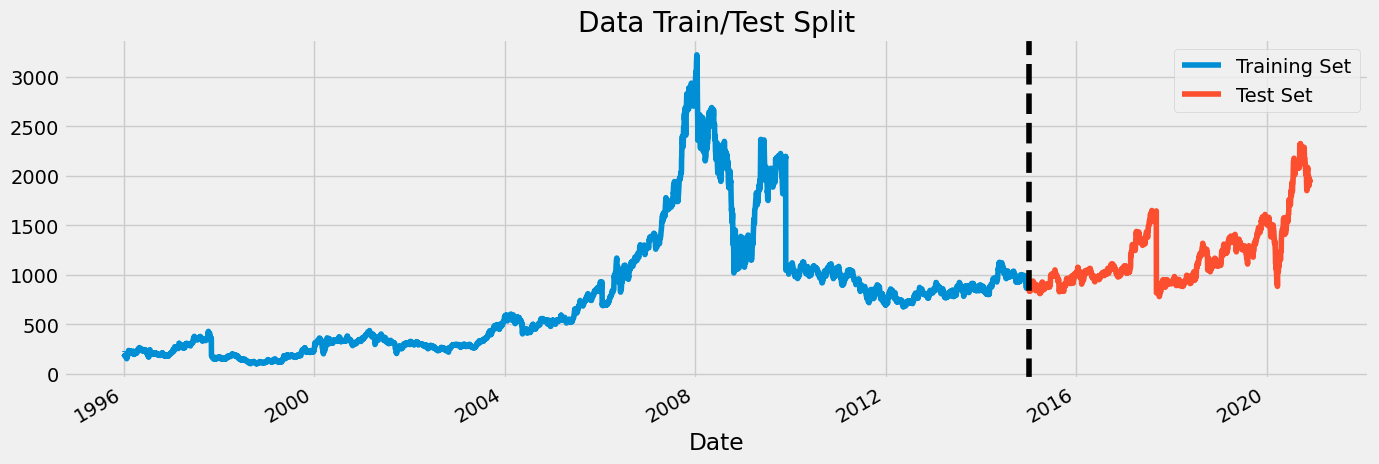

In [35]:
train = df_close.loc[df_close.index < '2015-01-01']
test = df_close.loc[df_close.index >= '2015-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

1 Month of Data

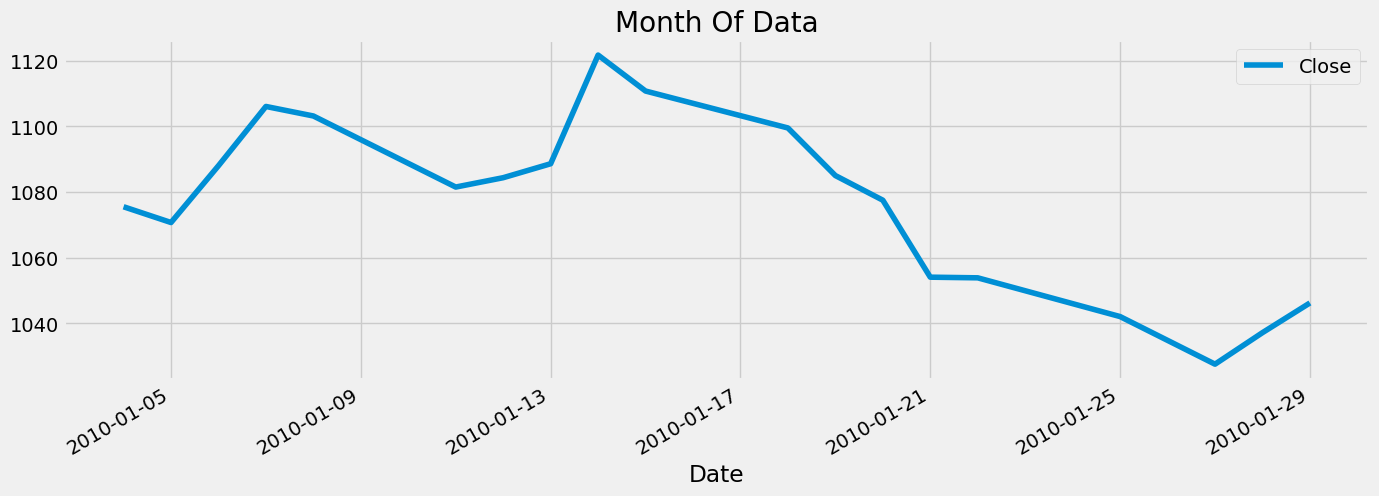

In [36]:
df_close.loc[(df_close.index > '2010-01-01') & (df_close.index < '2010-02-01')] \
    .plot(figsize=(15, 5), title='Month Of Data')
plt.show()

# Feature Creation

In [46]:
def create_features(df_close):
    """
    Create time series features based on time series index.
    """
    df_close = df_close.copy()
    df_close['dayofweek'] = df_close.index.dayofweek
    df_close['quarter'] = df_close.index.quarter
    df_close['month'] = df_close.index.month
    df_close['year'] = df_close.index.year
    df_close['dayofyear'] = df_close.index.dayofyear
    df_close['dayofmonth'] = df_close.index.day
    df_close['weekofyear'] = df_close.index.isocalendar().week
    return df_close

df_close = create_features(df_close)

# Visuzalize Feature/Target Relationship

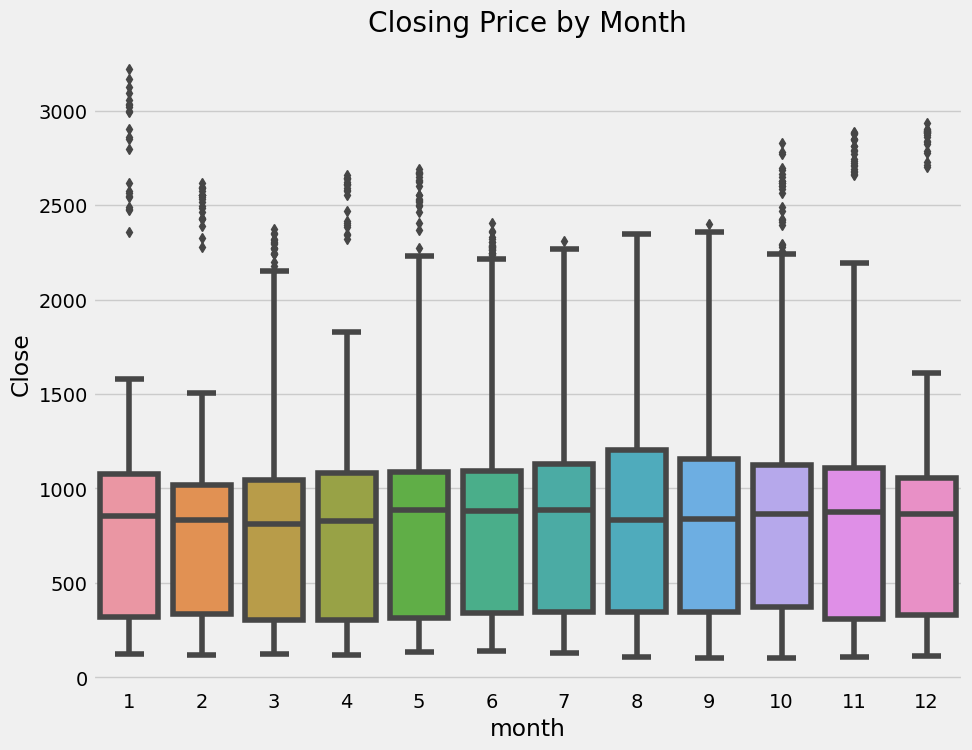

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_close, x='month', y='Close')
ax.set_title('Closing Price by Month')
plt.show()

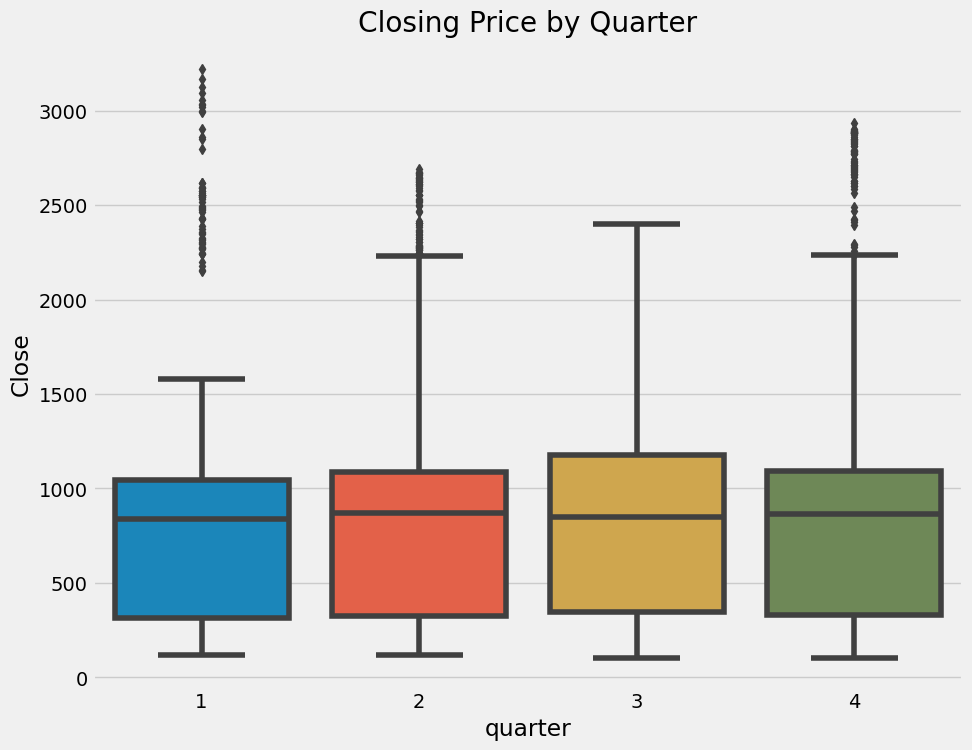

In [48]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_close, x='quarter', y='Close')
ax.set_title('Closing Price by Quarter')
plt.show()

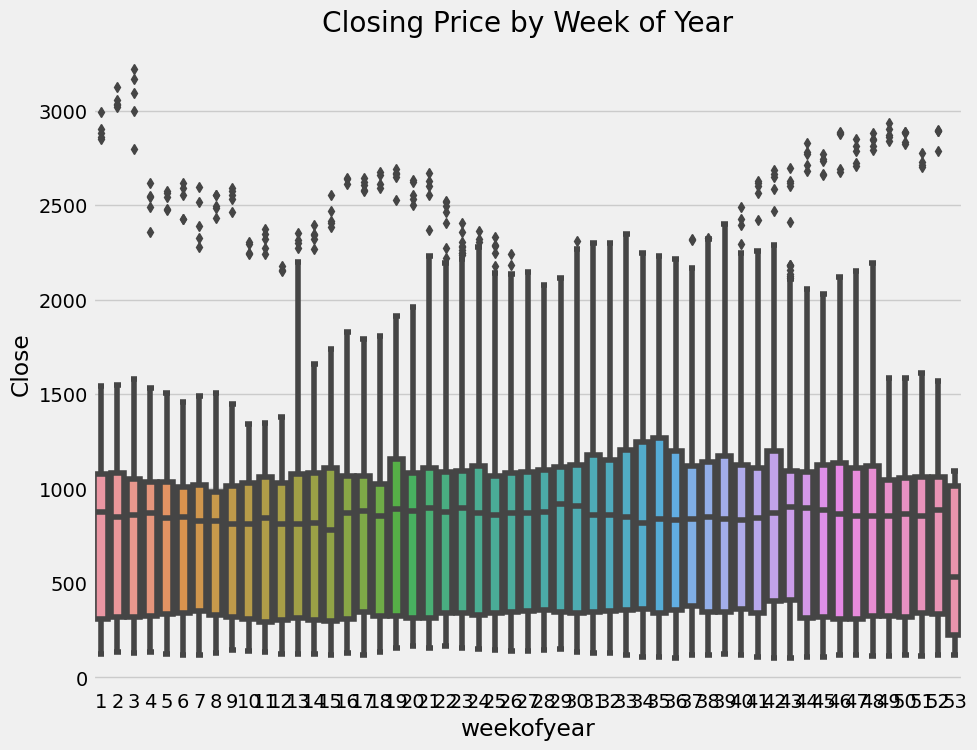

In [49]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_close, x='weekofyear', y='Close')
ax.set_title('Closing Price by Week of Year')
plt.show()

# Creating our Model

In [51]:
df_close.columns

Index(['Close', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

In [52]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear']
TARGET = 'Close'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [54]:
xgb_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                            n_estimators=1000,
                            early_stopping_rounds=50,
                            objective='reg:linear',
                            max_depth=3,
                            learning_rate=0.01)
xgb_model.fit(X_train, y_train,
             eval_set=[(X_train, y_train), (X_test, y_test)],
             verbose=100)

[0]	validation_0-rmse:969.67843	validation_1-rmse:1230.68048
[100]	validation_0-rmse:409.40427	validation_1-rmse:711.21252


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:03:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:244.65002	validation_1-rmse:523.39891
[300]	validation_0-rmse:206.22482	validation_1-rmse:457.03999
[400]	validation_0-rmse:195.75933	validation_1-rmse:432.98031
[500]	validation_0-rmse:185.22780	validation_1-rmse:418.61113
[600]	validation_0-rmse:167.75132	validation_1-rmse:414.04605
[700]	validation_0-rmse:140.69271	validation_1-rmse:410.56743
[800]	validation_0-rmse:124.69453	validation_1-rmse:408.89275
[900]	validation_0-rmse:117.46317	validation_1-rmse:407.51229
[999]	validation_0-rmse:113.56625	validation_1-rmse:406.13288


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

# Feature Importanc

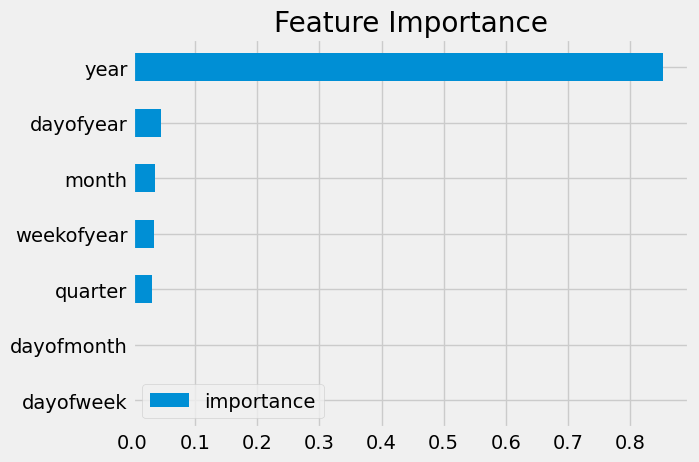

In [55]:
fi = pd.DataFrame(data=xgb_model.feature_importances_,
             index=xgb_model.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# Forecast on Test Set

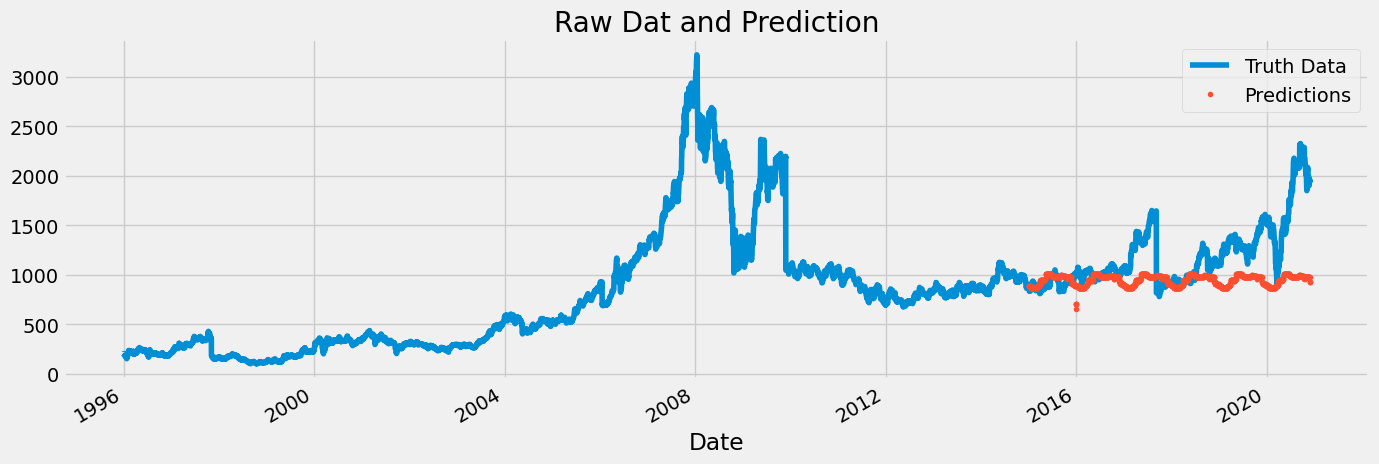

In [58]:
test['prediction'] = xgb_model.predict(X_test)
df_close = df_close.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df_close[['Close']].plot(figsize=(15, 5))
df_close['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

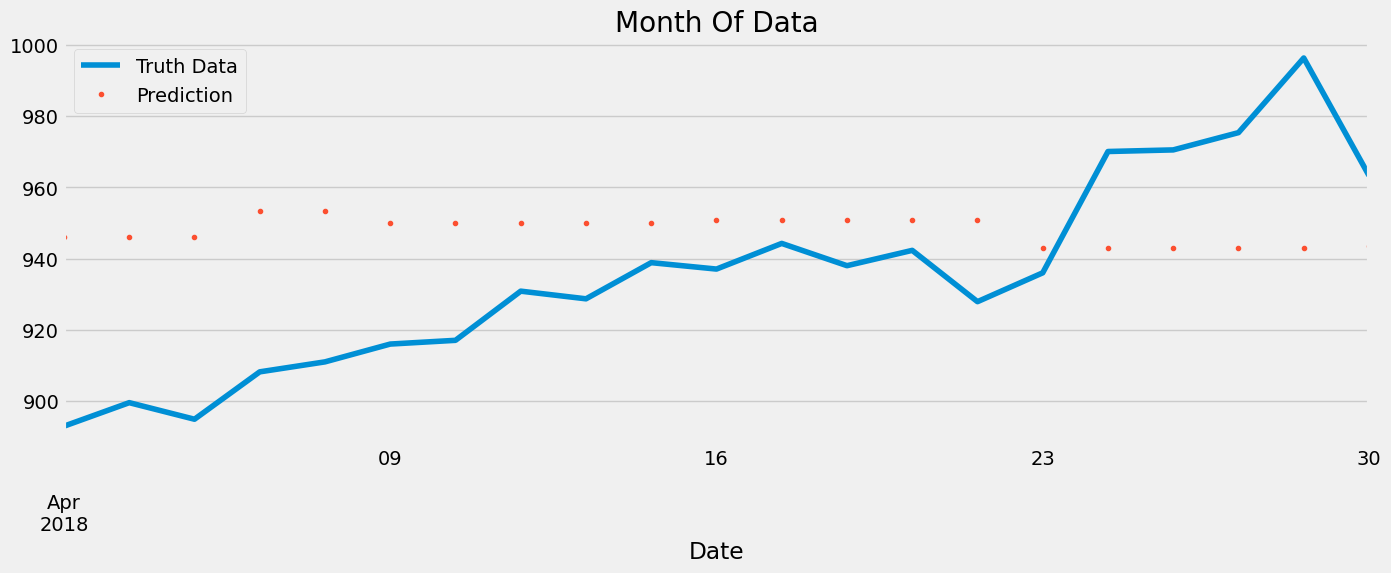

In [59]:
ax = df_close.loc[(df_close.index > '2018-04-01') & (df_close.index < '2018-05-01')]['Close'] \
    .plot(figsize=(15, 5), title='Month Of Data')
df_close.loc[(df_close.index > '2018-04-01') & (df_close.index < '2018-05-01')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [60]:
score = np.sqrt(mean_squared_error(test['Close'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 406.13


In [61]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2020-09-16    1334.176892
2020-09-15    1328.476892
2020-09-11    1323.162964
2020-09-10    1317.412964
2020-09-18    1315.326892
2020-09-14    1311.355725
2020-09-17    1308.376892
2020-10-14    1304.535217
2020-10-13    1297.735217
2020-10-07    1271.519531
Name: error, dtype: float64

Our model isn't the best, we can add more hyperparameter tuning and use add more features such as Possible Recession, Inflation. We can also use our odel columns such as opening price, high price and so on. 

# Volatility and Risk Assessment

In [63]:
df_high_low = df[['High', 'Low']]

In [64]:
df_high_low.head()

,High,Low
Date,,
1996-01-01,206.10,203.65
1996-01-02,206.25,202.65
1996-01-03,216.95,205.25
1996-01-04,204.40,201.05
1996-01-05,203.00,200.65


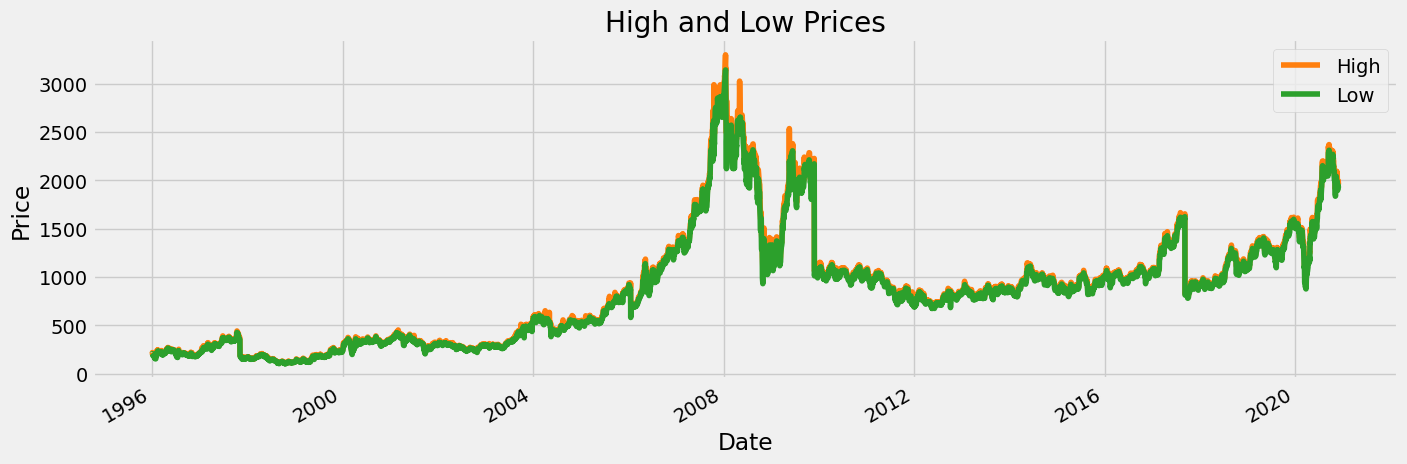

In [65]:
df_high_low.plot(
    figsize=(15, 5),
    title='High and Low Prices',
    color=[color_pal[1], color_pal[2]]  # Use distinct colors for each column
)
plt.ylabel('Price')
plt.show()

In [68]:
df_high_low = df[['High', 'Low']].copy()
df_high_low['Volatility'] = df_high_low['High'] - df_high_low['Low']

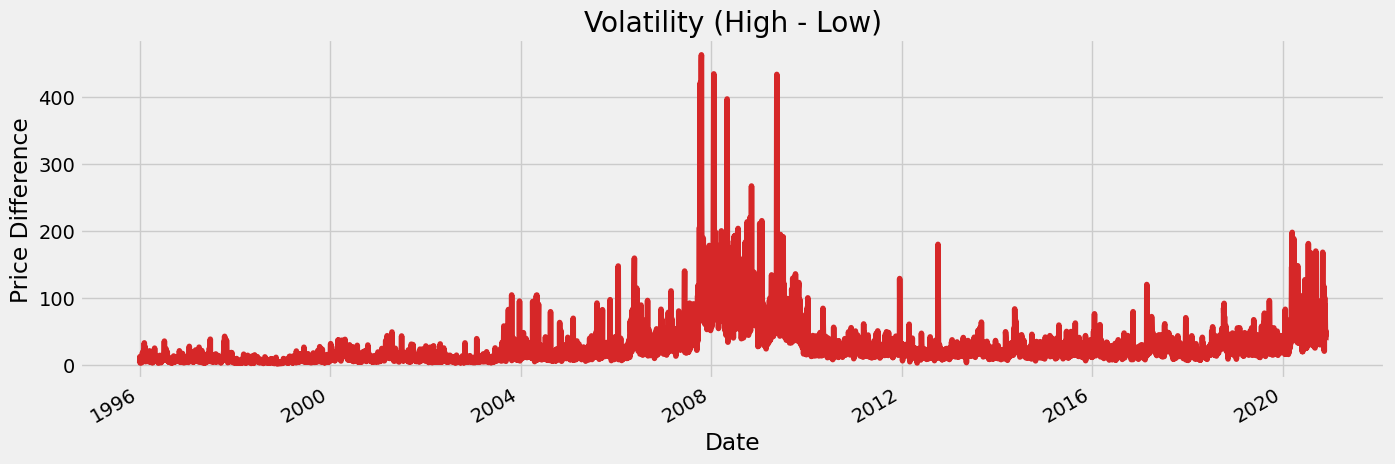

In [69]:
df_high_low['Volatility'].plot(
    figsize=(15, 5),
    color=color_pal[3],
    title='Volatility (High - Low)'
)
plt.ylabel('Price Difference')
plt.show()

The period between 2008 and 2009 was marked by the Global Financial Crisis hence the the high volatility

# Seasonality, Trend and Noise

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

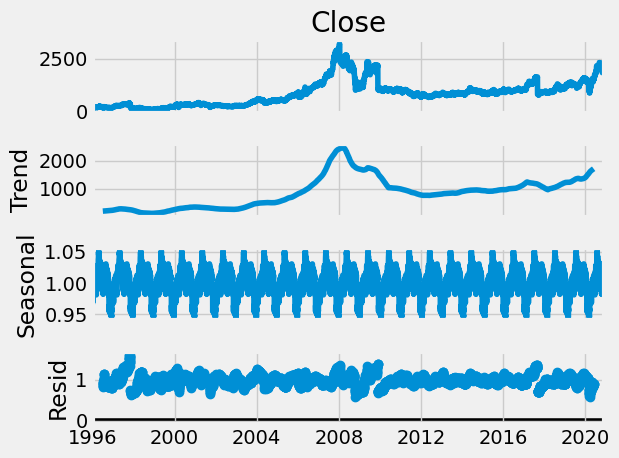

In [71]:
result = seasonal_decompose(df['Close'], model='multiplicative', period=252)
result.plot()
plt.show()